In [1]:
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  aparnasunil11


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████████████████████████████████████████████████████████████████████████| 1.55k/1.55k [00:00<00:00, 58.0kB/s]

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#no missing values 

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [10]:
#no duplicates 

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


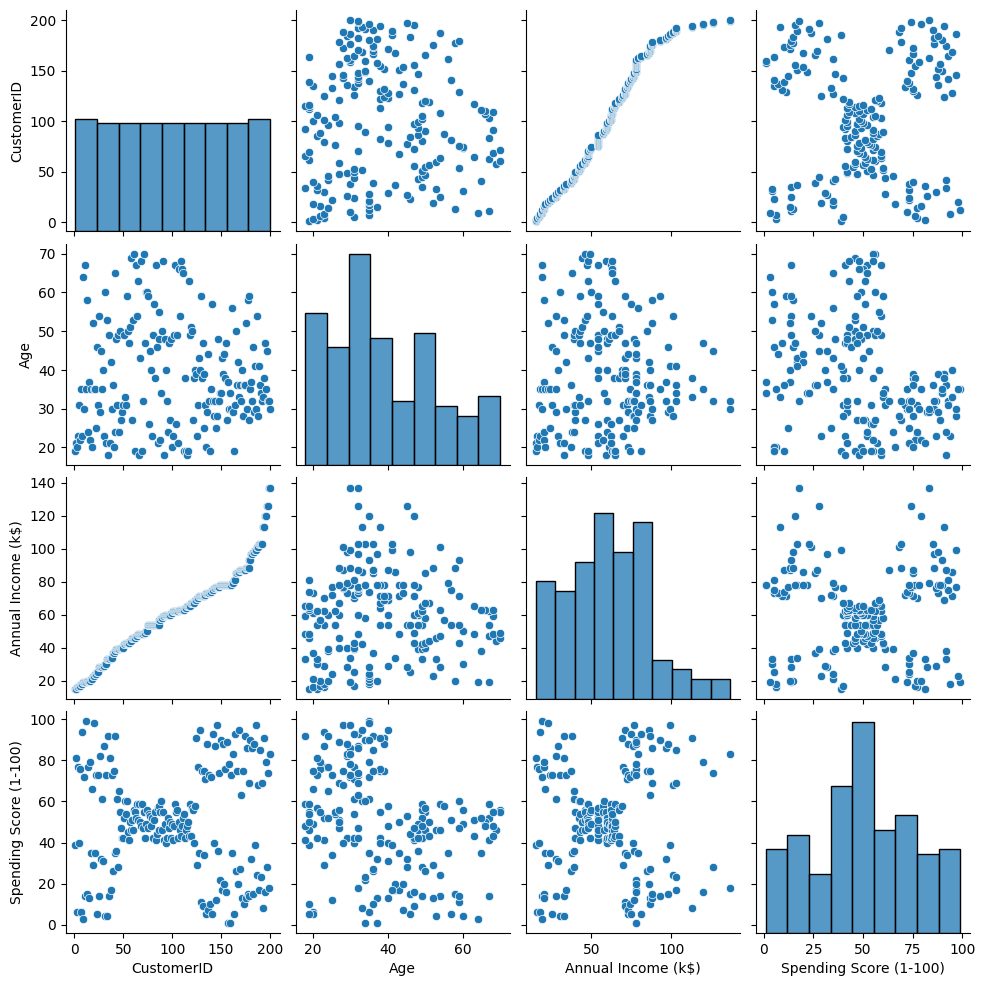

In [12]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='Gender'>

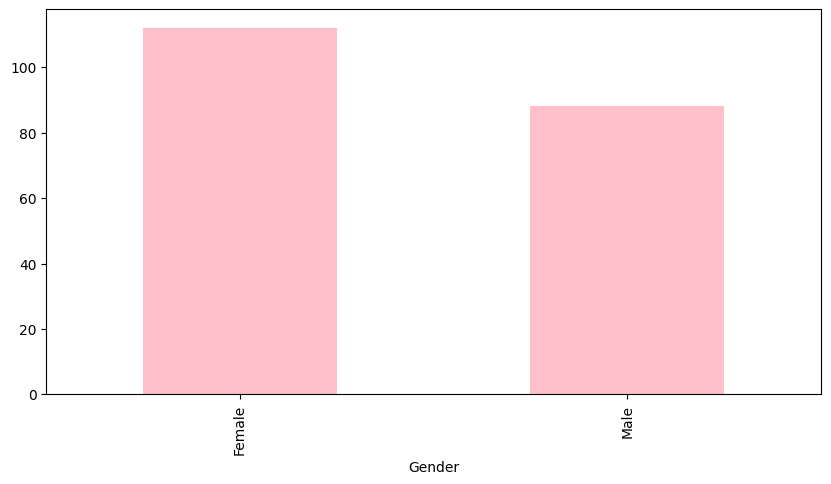

In [13]:
df.Gender.value_counts().plot(kind='bar', figsize=(10,5), color='pink')

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
df.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [20]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

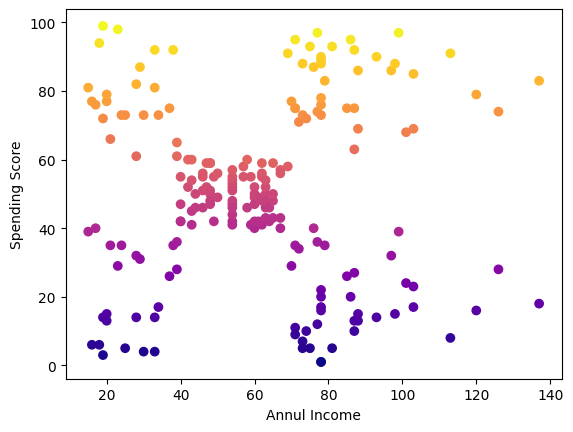

In [23]:
plt.scatter(df['Annual_Income'],df['Spending_Score'], c=df['Spending_Score'], cmap = plt.cm.plasma)
plt.xlabel('Annul Income')
plt.ylabel('Spending Score')

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

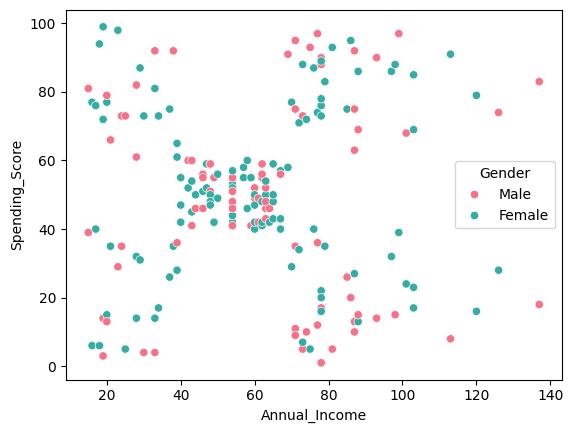

In [24]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender', palette='husl')

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

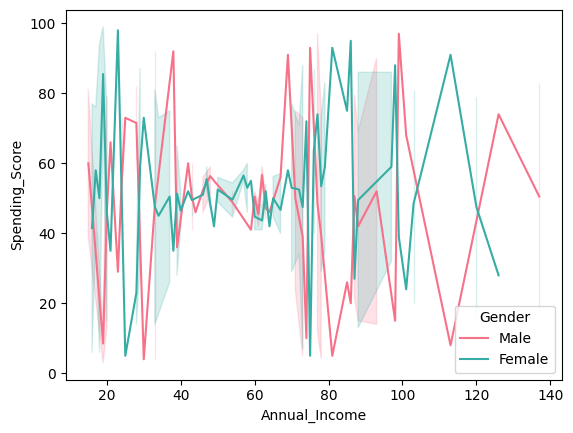

In [25]:
sns.lineplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender', palette='husl')

<Axes: xlabel='Spending_Score', ylabel='Density'>

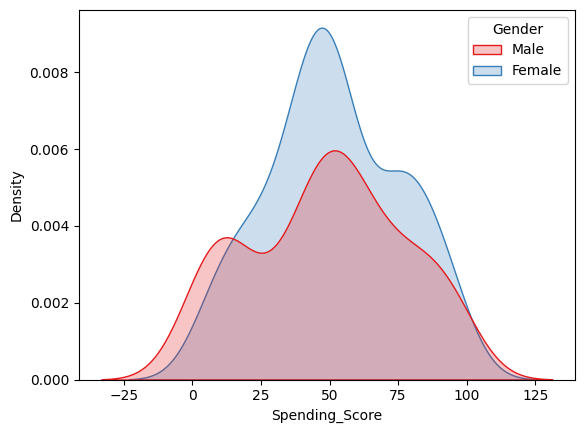

In [26]:
sns.kdeplot(data=df, x='Spending_Score', fill=True, hue='Gender',palette='Set1')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [30]:
corr = df.corr()

<Axes: >

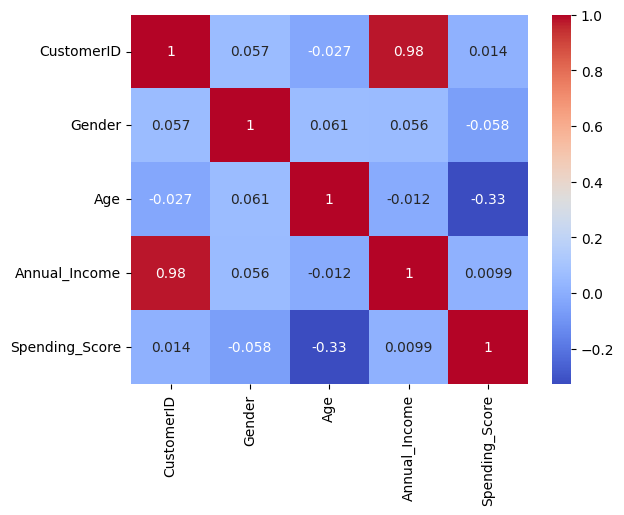

In [31]:
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [32]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Annual_Income', 'Spending_Score']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert scaled features back to a DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=['Annual_Income', 'Spending_Score'])


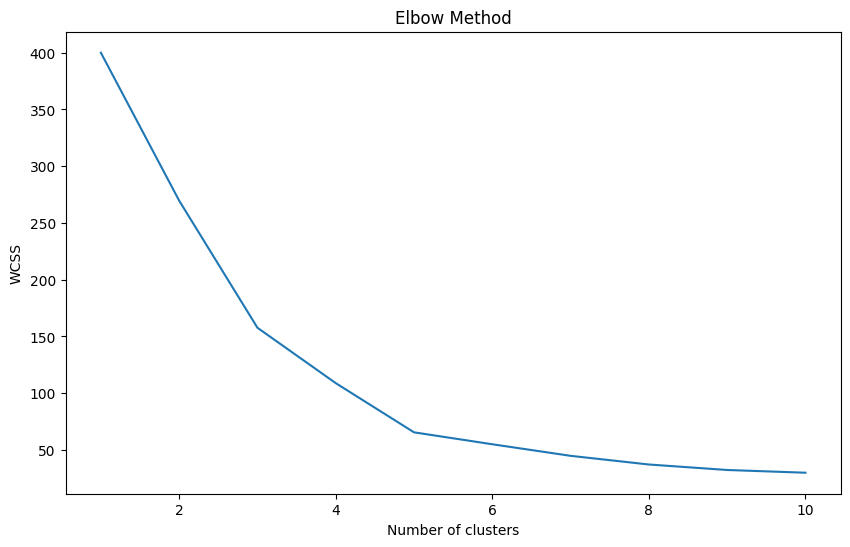

In [33]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


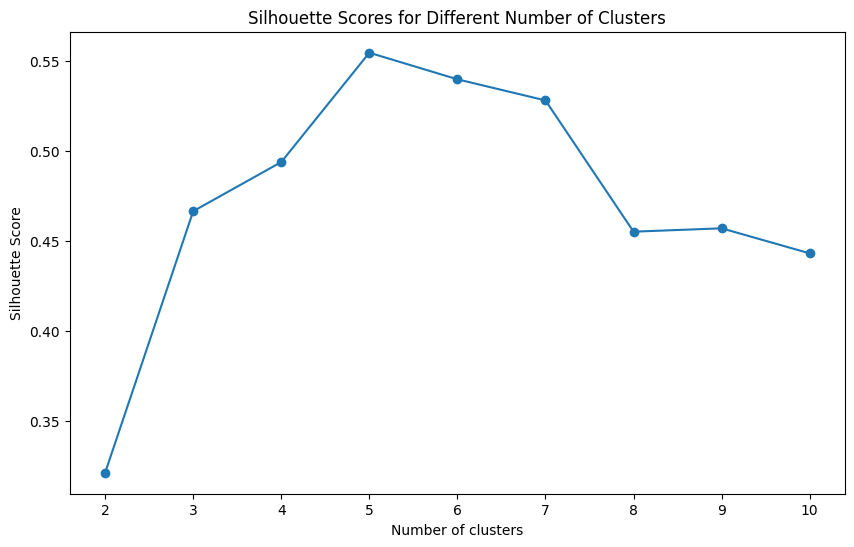

In [34]:
#elbow at 3, so probably optimal number of clusters 
#we will check with silhouette scores too 
#higher score indicates better clusters

from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    y_kmeans = kmeans.predict(df_scaled)
    score = silhouette_score(df_scaled, y_kmeans)
    silhouette_scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [35]:
#5 seems more optimal 

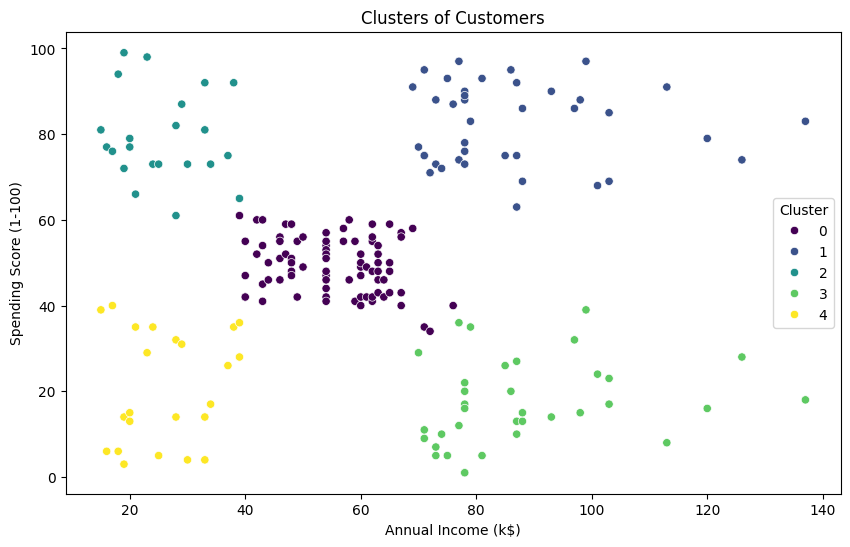

Cluster Centroids:
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
Silhouette Score: 0.5546571631111091


In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)
df['Cluster'] = y_kmeans
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
centroids = kmeans.cluster_centers_
print("Cluster Centroids:\n", centroids)
score = silhouette_score(df_scaled, y_kmeans)
print(f'Silhouette Score: {score}')


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_scaled, test_size=0.3, random_state=42)


In [39]:
# Fit KMeans on the train set
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)


y_test = kmeans.predict(X_test) #predict on test set

silhouette_test = silhouette_score(X_test, y_test) #evaluating
print(f'Silhouette Score on Test Set: {silhouette_test}')


Silhouette Score on Test Set: 0.5551134384223857


In [40]:
#dimensionality reduction with pca

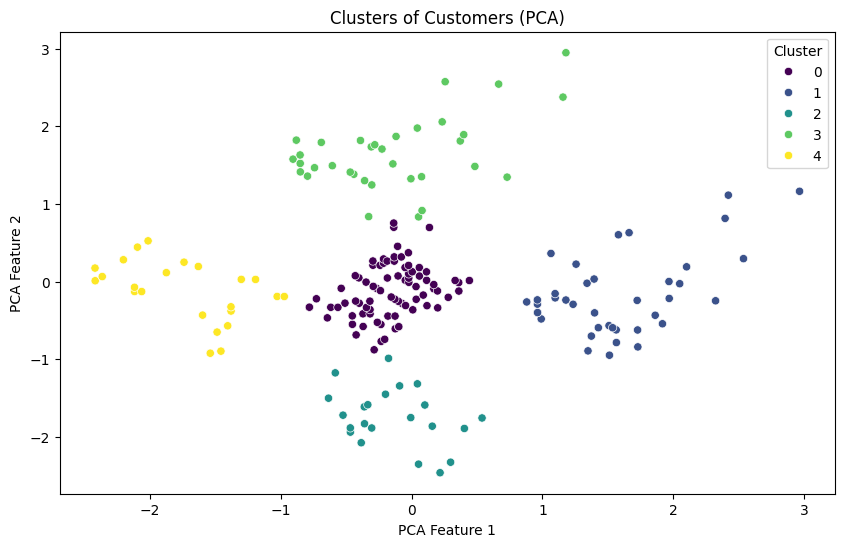

Silhouette Score (PCA): 0.5546571631100179


In [41]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_scaled)

# Fit KMeans with PCA features
kmeans_pca = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(pca_features)

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=y_kmeans_pca, palette='viridis')
plt.title('Clusters of Customers (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.show()

# Evaluate with Silhouette Score
score_pca = silhouette_score(pca_features, y_kmeans_pca)
print(f'Silhouette Score (PCA): {score_pca}')


In [42]:
#cluster profiling 

Cluster Profiles:
          CustomerID    Gender        Age  Annual_Income  Spending_Score
Cluster                                                                
0         86.320988  0.407407  42.716049      55.296296       49.518519
1        162.000000  0.461538  32.692308      86.538462       82.128205
2         23.090909  0.409091  25.272727      25.727273       79.363636
3        164.371429  0.542857  41.114286      88.200000       17.114286
4         23.000000  0.391304  45.217391      26.304348       20.913043


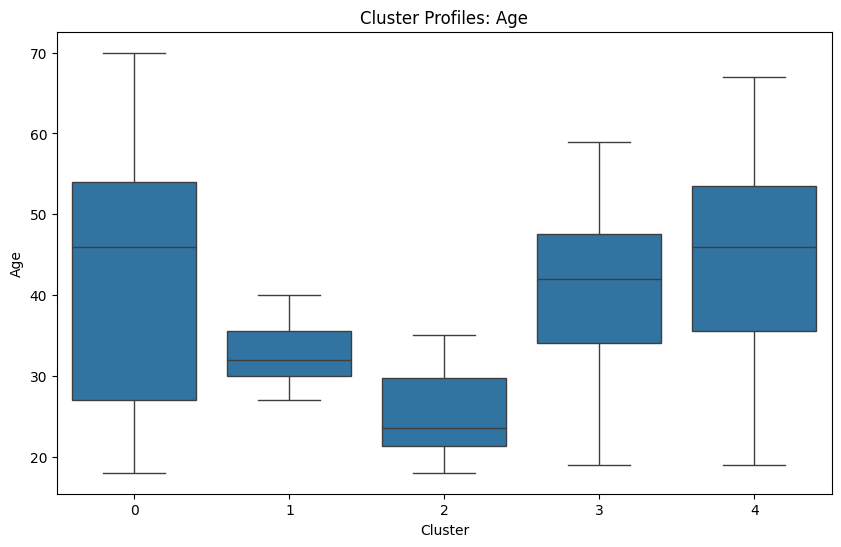

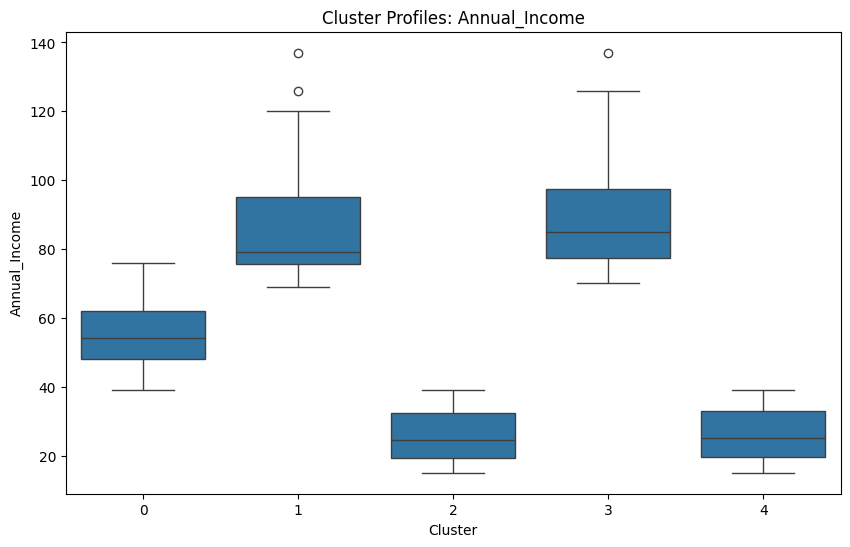

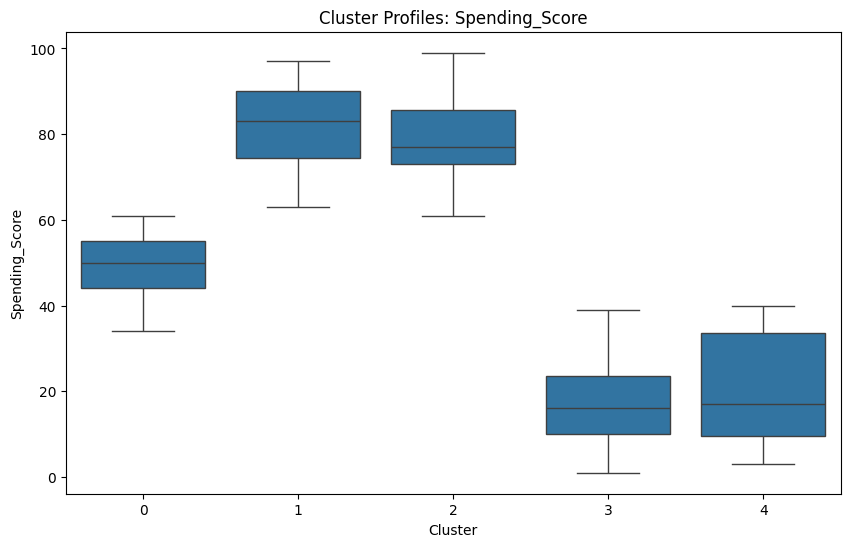

In [43]:
cluster_profiles = df.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)


for col in ['Age', 'Annual_Income', 'Spending_Score']:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Cluster Profiles: {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()


In [44]:
#deploying model using streamlit

2024-07-16 12:20:45.524 
  command:

    streamlit run /home/user/.local/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-07-16 12:20:45.529 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

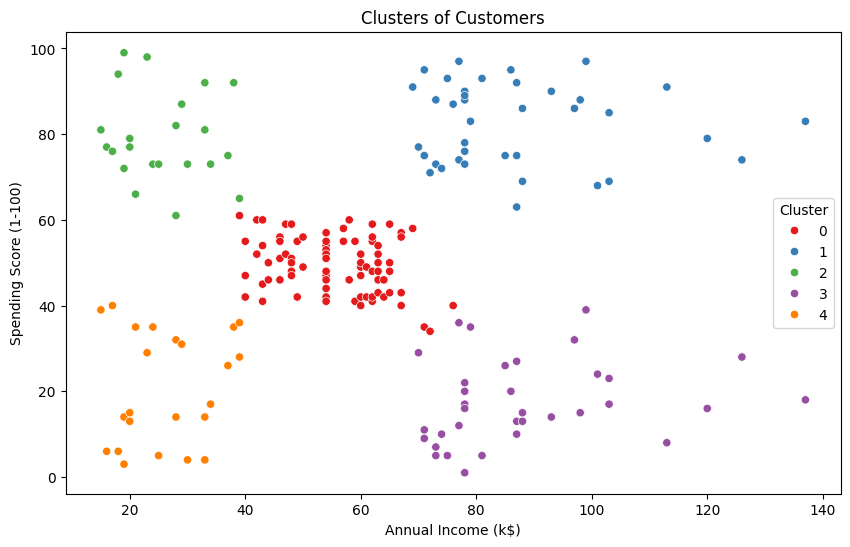

In [46]:
import streamlit as st


features = df[['Annual_Income', 'Spending_Score']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

st.title('Customer Segmentation')
st.write('This app uses K-Means clustering to segment customers.') #streamlit

cluster = st.selectbox('Select Cluster', df['Cluster'].unique()) #select cluster

cluster_profile = df[df['Cluster'] == cluster].describe() #display cluster profile
st.write('Cluster Profile:', cluster_profile)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Cluster', palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
st.pyplot(plt)


In [47]:
#feature engineering

In [48]:
df['Income_per_Age'] = df['Annual_Income'] / df['Age']
df['Spending_per_Age'] = df['Spending_Score'] / df['Age']
df['Income_to_Spending'] = df['Annual_Income'] / df['Spending_Score']

# Re-run KMeans with new features
features = df[['Annual_Income', 'Spending_Score', 'Income_per_Age', 'Spending_per_Age', 'Income_to_Spending']]
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)


In [49]:
#PCA again

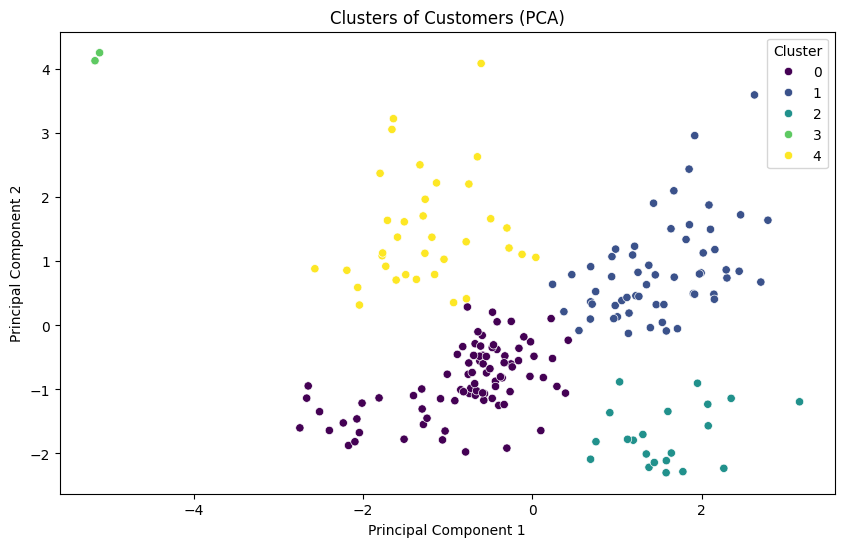

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [52]:
#advanced 

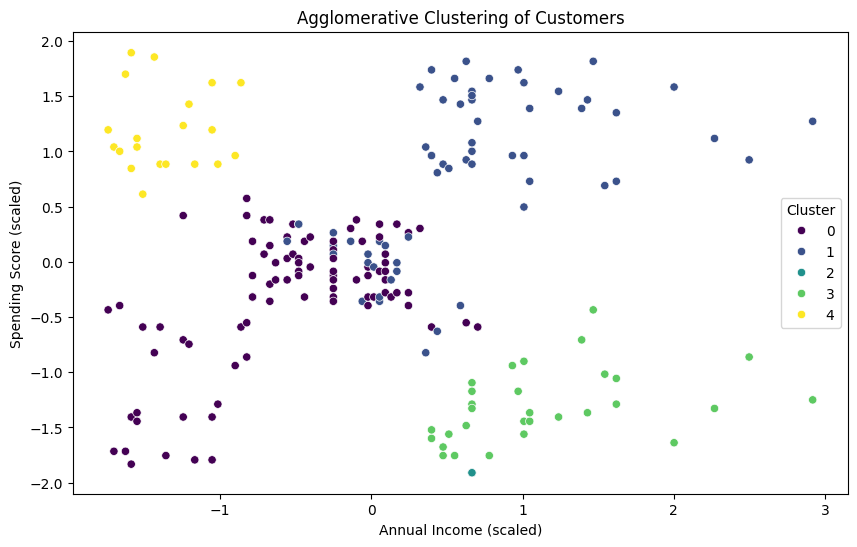

In [53]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg_clustering.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=features_scaled[:,0], y=features_scaled[:,1], hue=df['Agg_Cluster'], palette='viridis')
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()


In [54]:
#cross validation

In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

kf = KFold(n_splits=5)
silhouette_scores = []

for train_index, test_index in kf.split(features_scaled):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_test)
    score = silhouette_score(X_test, labels)
    silhouette_scores.append(score)

print(f'Cross-validated silhouette scores: {silhouette_scores}')
print(f'Mean silhouette score: {np.mean(silhouette_scores)}')


Cross-validated silhouette scores: [np.float64(0.3746596034298711), np.float64(0.2556842468581775), np.float64(0.6677241169565555), np.float64(0.23920017477739214), np.float64(0.6098928528308638)]
Mean silhouette score: 0.429432198970572


In [58]:
# Define criteria for target customers
target_clusters = cluster_profiles[cluster_profiles['Spending_Score'] > 60].index

print(f"Target Clusters: {target_clusters}")

# Filter data to get target customers
target_customers = df[df['Cluster'].isin(target_clusters)]
print("Target Customers:")
print(target_customers.head())


Target Clusters: Index([1, 2], dtype='int32', name='Cluster')
Target Customers:
   CustomerID  Gender  Age  Annual_Income  Spending_Score  Cluster  \
1           2       1   21             15              81        2   
3           4       0   23             16              77        2   
5           6       0   22             17              76        2   
7           8       0   23             18              94        2   
9          10       0   30             19              72        2   

   Income_per_Age  Spending_per_Age  Income_to_Spending  Agg_Cluster  
1        0.714286          3.857143            0.185185            4  
3        0.695652          3.347826            0.207792            4  
5        0.772727          3.454545            0.223684            4  
7        0.782609          4.086957            0.191489            4  
9        0.633333          2.400000            0.263889            4  


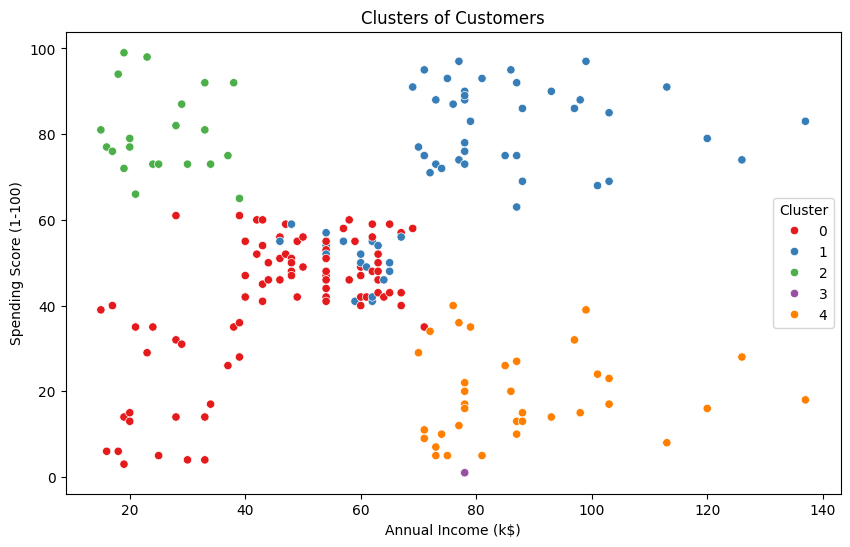

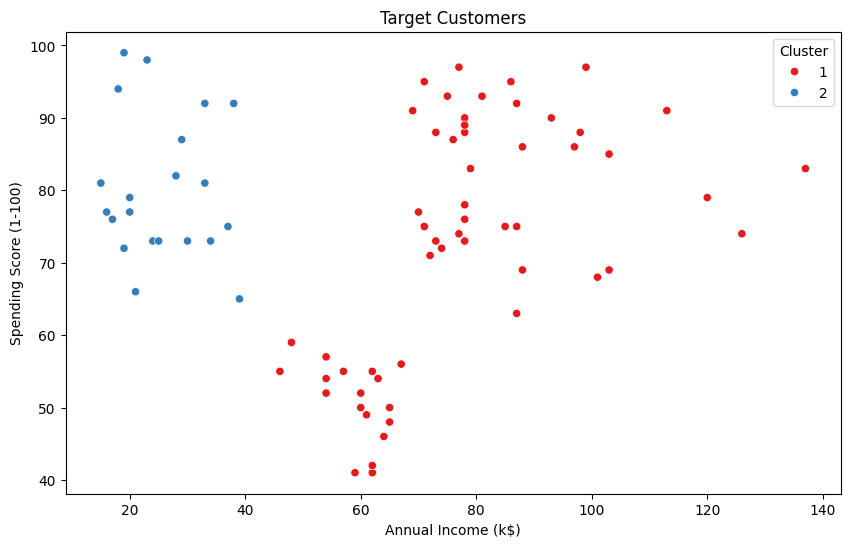

In [59]:
import seaborn as sns

# Plot all clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Highlight target customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=target_customers, palette='Set1')
plt.title('Target Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [60]:
def marketing_strategy(cluster_num):
    if cluster_num == 1:
        print("Cluster 1: High spenders with high income, mostly young adults.")
        print("Marketing Strategy: Luxury and premium products, social media and influencer marketing, exclusive deals and early access.")
    elif cluster_num == 2:
        print("Cluster 2: Low income but high spending, mostly young adults.")
        print("Marketing Strategy: Value-for-money products, online advertising and promotions, installment payment options.")
    print("-" * 40)

for cluster in target_clusters:
    marketing_strategy(cluster)

Cluster 1: High spenders with high income, mostly young adults.
Marketing Strategy: Luxury and premium products, social media and influencer marketing, exclusive deals and early access.
----------------------------------------
Cluster 2: Low income but high spending, mostly young adults.
Marketing Strategy: Value-for-money products, online advertising and promotions, installment payment options.
----------------------------------------
